In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Salary Data.csv")

In [3]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [5]:
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [6]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [7]:
df.dropna(inplace = True)

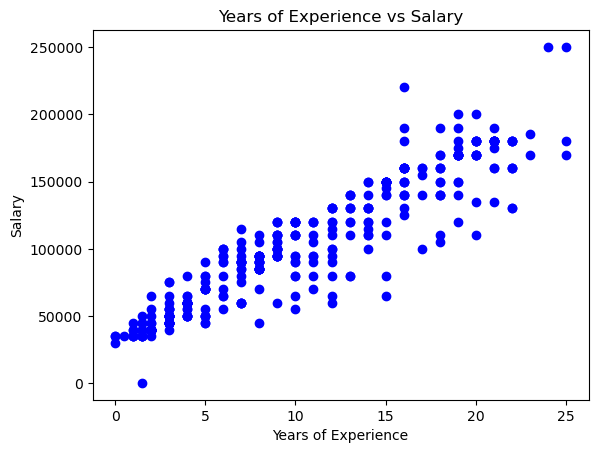

In [8]:
import matplotlib.pyplot as plt

# Scatter plot to visualize data points
plt.scatter(df['Years of Experience'], df['Salary'], color='blue')
plt.title('Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split the data into features (X) and target (y)
X = df[['Years of Experience']]
y = df['Salary']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [12]:
y_pred = model.predict(X_test)


In [13]:
y_predi = pd.DataFrame({'Predicted': y_pred, 'actual': y_test})

In [14]:
y_predi

,Predicted,actual
329,174795.471295,180000.0
33,99746.979370,65000.0
15,140682.520420,125000.0
316,72456.618670,80000.0
57,147505.110595,140000.0
...,...,...
94,79279.208845,75000.0
196,106569.569545,90000.0
313,58811.438320,60000.0
294,127037.340070,140000.0


In [15]:
y_pred = model.predict(X_train)
df = pd.DataFrame({'Predicted': y_pred, 'actual': y_train})
df

,Predicted,actual
193,79279.208845,95000.0
75,99746.979370,95000.0
84,45166.257970,40000.0
363,65634.028495,70000.0
16,79279.208845,90000.0
...,...,...
71,106569.569545,70000.0
106,51988.848145,50000.0
272,86101.799020,90000.0
350,140682.520420,160000.0


In [18]:
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"y_pred shape: {y_pred.shape}")


X_test shape: (75, 1)
y_test shape: (75,)
y_pred shape: (298,)


In [20]:
min_length = min(len(X_test), len(y_test), len(y_pred))
X_test = X_test[:min_length]
y_test = y_test[:min_length]
y_pred = y_pred[:min_length]



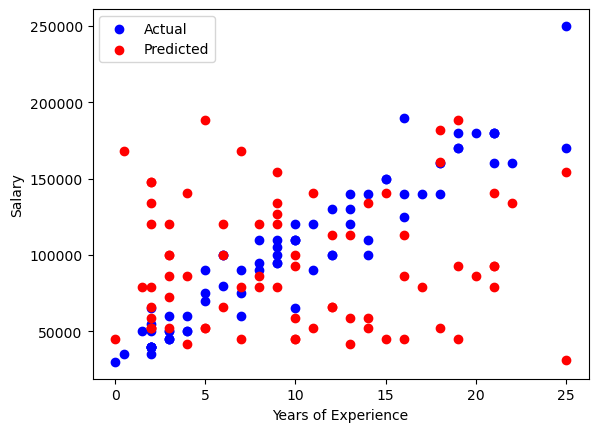

In [24]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()


In [25]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Absolute Error: 49695.955612162645
R-squared: -0.6588290997785027


In [31]:
from sklearn.utils.multiclass import type_of_target

print(type_of_target(y_test))  # Should be 'binary' or 'multiclass'
print(type_of_target(y_pred))  # Should be 'binary' or 'multiclass', not 'continuous'


multiclass
continuous


In [32]:
# For binary classification, threshold at 0.5
y_pred_class = [1 if pred >= 0.5 else 0 for pred in y_pred]


In [33]:
import numpy as np
y_pred_class = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels


AxisError: axis 1 is out of bounds for array of dimension 1

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [29]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Mean Absolute Error: ', mae)
print('Mean Squared Error: ', mse)
print('Root Mean Squared Error: ', rmse)

NameError: name 'mean_squared_error' is not defined